# 소상공인시장진흥공단_상가업소정보_201906

* https://www.data.go.kr/dataset/15012005/fileData.do

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 

In [4]:
shop_2019 = pd.read_csv('../data/commercial_store/소상공인시장진흥공단_상가업소정보_201906_01.csv')
shop_2019.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
1  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
2  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
3  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
0    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041       NaN   
1    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748       NaN   
2    Q07A10        토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
3    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378      대치상가   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490       NaN   

                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0    서울특별시 강남구 선릉로93길 6  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
1    서울특별시 금천구 가산로 34-6  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
2      부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455  35.159774  
3  서울특별시 강남구 남부순환로 2933  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
4      서울특별시 송파구 가락로 71  138846   5690.0  NaN   1  NaN  127.104071  37.500249  

[5 rows x 39 columns]

In [6]:
shop_2019.shape

(565016, 39)

In [7]:
coffee = shop_2019[shop_2019['상권업종소분류명'].str.contains('커피')]
coffee.shape

(23103, 39)

In [11]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
# 상호명으로 봤을 때 커피점이 15205개가 있다.
coffee['상호명'].unique().shape

(15205,)

In [18]:
coffee['상호명'].value_counts()

간단하지만특별한화피디Cafe         1477
이디야커피                    538
스타벅스                     370
투썸플레이스                   165
커피빈                      153
엔제리너스                    134
할리스커피                    124
카페베네                     110
탐앤탐스                     109
커피베이                     104
공차                        99
쥬씨                        93
빽다방                       92
커피에반하다                    76
파스쿠찌                      69
요거프레소                     69
커피나무                      58
토프레소                      56
컴포즈커피                     52
쥬스식스                      52
커피하우스                     46
더카페                       45
커피마마                      45
더벤티                       43
메가커피                      42
설빙                        39
할리스                       35
셀렉토커피                     33
커피니                       30
마리웨일237                   28
                        ... 
웨이크업굿나잇                    1
파빙목동파리공원점                  1
카페보스토크                     1
엔학고레          

In [19]:
coffee[coffee['상호명']=='간단하지만특별한화피디Cafe']

상가업소번호              상호명                지점명 상권업종대분류코드 상권업종대분류명  \
7789    22729790  간단하지만특별한화피디Cafe          에델리아하이마트점         Q       음식   
13663   20012278  간단하지만특별한화피디Cafe           카그뮤지컬예당점         Q       음식   
15550   20659435  간단하지만특별한화피디Cafe             드마린논현점         Q       음식   
26169   22698069  간단하지만특별한화피디Cafe             루이스신사점         Q       음식   
43549   20833165  간단하지만특별한화피디Cafe             셀렉토스타점         Q       음식   
46554   20561131  간단하지만특별한화피디Cafe      그랑KT부산정보통신센터점         Q       음식   
46827    3182203  간단하지만특별한화피디Cafe              모아가산점         Q       음식   
53037   23428519  간단하지만특별한화피디Cafe               H무역점         Q       음식   
65282   23253872  간단하지만특별한화피디Cafe        마마스미니현대압구정점         Q       음식   
65369   19979480  간단하지만특별한화피디Cafe            드구띠에역삼점         Q       음식   
78433   23190292  간단하지만특별한화피디Cafe         반디앤루니스코엑스점         Q       음식   
80508   23508142  간단하지만특별한화피디Cafe               H부산점         Q       음식   
83054   20819023  간단하지만특별한화피디Cafe           파스쿠찌연세대점         Q       음식   
93470   20027813  간단하지만특별한화피디Cafe            리앙인디에프점         Q       음식   
102035  20010797  간단하지만특별한화피디Cafe         안젤로서초평화빌딩점         Q       음식   
106523  23236754  간단하지만특별한화피디Cafe               지대치점         Q       음식   
122022  23263775  간단하지만특별한화피디Cafe          느티나무137동점         Q       음식   
122369  23501856  간단하지만특별한화피디Cafe              산다2호점         Q       음식   
122982  23391515  간단하지만특별한화피디Cafe           쉐어링동양생명점         Q       음식   
126145  19981474  간단하지만특별한화피디Cafe           아띠지아노이대점         Q       음식   
130749  20677194  간단하지만특별한화피디Cafe             쟈스충무로점         Q       음식   
136329  20308618  간단하지만특별한화피디Cafe             드롭탑덕천점         Q       음식   
139994  23156778  간단하지만특별한화피디Cafe           루고가든파이브점         Q       음식   
154650  25358749  간단하지만특별한화피디Cafe          마마스센트럴시티점         Q       음식   
154881  23189999  간단하지만특별한화피디Cafe             블로그신천점         Q       음식   
155252  23240225  간단하지만특별한화피디Cafe             두오모구서점         Q       음식   
158611  25301010  간단하지만특별한화피디Cafe           파스쿠찌가양역점         Q       음식   
165367  25251441  간단하지만특별한화피디Cafe           파스쿠치태종대점         Q       음식   
170207  26432619  간단하지만특별한화피디Cafe            센티모르교대점         Q       음식   
171469  26429651  간단하지만특별한화피디Cafe                NaN         Q       음식   
...          ...              ...                ...       ...      ...   
562400  16182800  간단하지만특별한화피디Cafe               끌라시코         Q       음식   
562404  16184926  간단하지만특별한화피디Cafe               16TH         Q       음식   
562405  16184893  간단하지만특별한화피디Cafe                옐로콩         Q       음식   
562579  16204090  간단하지만특별한화피디Cafe               크라프트         Q       음식   
562584  16183931  간단하지만특별한화피디Cafe            웰니스맘앤키즈         Q       음식   
562585  16183945  간단하지만특별한화피디Cafe                모에드         Q       음식   
562586  16183929  간단하지만특별한화피디Cafe             모자이크교회         Q       음식   
562587  16183745  간단하지만특별한화피디Cafe              알콩달콩떡         Q       음식   
562588  16183740  간단하지만특별한화피디Cafe                드파리         Q       음식   
562602  16182793  간단하지만특별한화피디Cafe               드구띠에         Q       음식   
562603  16182786  간단하지만특별한화피디Cafe                두드림         Q       음식   
562604  16182699  간단하지만특별한화피디Cafe               레인보우         Q       음식   
562605  16182706  간단하지만특별한화피디Cafe              달콤한오늘         Q       음식   
562606  16182698  간단하지만특별한화피디Cafe                마죠레         Q       음식   
562608  16182682  간단하지만특별한화피디Cafe                메타포         Q       음식   
562609  16182694  간단하지만특별한화피디Cafe               넬비코로         Q       음식   
562610  16182693  간단하지만특별한화피디Cafe                고릴라         Q       음식   
562614  16184856  간단하지만특별한화피디Cafe                커피씨         Q       음식   
562631  16184664  간단하지만특별한화피디Cafe                다디오         Q       음식   
562821  16293146  간단하지만특별한화피디Cafe                부티크         Q       음식   
562979  16296599  간단하지만특별한화피디Cafe                온21         Q       음식   
563051  16287532  간단하지만특별한화피디Cafe  

In [11]:
coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique()

array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스가락시장역점', '스타벅스외대점',
       '스타벅스연세백양로점', '스타벅스명지대점', '스타벅스석촌역', '스타벅스연대동문', '스타벅스압구정로데오역',
       '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점', '스타벅스삼선교점',
       '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스종각점', '스타벅스방배카페입구',
       '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스천호로데오점', '스타벅스마포일진빌딩점', '스타벅스용산역점',
       '스타벅스명동메트로', '스타벅스중계역점', '스타벅스마포아크로타워점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점', '스타벅스삼성도심공항점',
       '스타벅스부산서면', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스선릉로점',
       '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2', '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점',
       '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점', '스타벅스남산스테이트',
       '스타벅스구로하이엔드점', '스타벅스명일이마트점', '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스삼성교점',
       '스타벅스서울교대점', '스타벅스커리학동사거리점', '스타벅스강북구청사거리점', '스타벅스청담사거리점',
       '스타

In [20]:
coffee['시도명'].isnull().sum()

0

In [21]:
# 다른 지역을 참고하고 싶다면 같은 폴더에 있는 다른 파일을 참고해 주세요.
coffee['시도명'].value_counts()

서울특별시    18341
부산광역시     4762
Name: 시도명, dtype: int64

In [22]:
coffee['시군구명'].unique()

array(['강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '마포구', '종로구', '도봉구',
       '북구', '남구', '기장군', '광진구', '서대문구', '은평구', '해운대구', '양천구', '용산구',
       '관악구', '성동구', '사상구', '금천구', '송파구', '동대문구', '사하구', '강서구', '금정구',
       '동작구', '중랑구', '강북구', '강동구', '수영구', '연제구', '노원구', '부산진구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [23]:
coffee['상권업종중분류명'].value_counts()

커피점/카페    23103
Name: 상권업종중분류명, dtype: int64

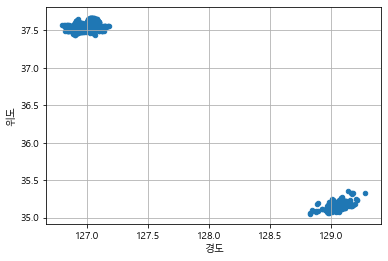

In [24]:
shop_2019[:1000].plot.scatter(x="경도", y="위도", grid="True")

In [11]:
df_seoul = shop_2019.loc[shop_2019['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(401071, 39)

In [12]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          344270
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      23587
표준산업분류명       23587
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         75924
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        354031
건물관리번호            0
건물명          205736
도로명주소             0
구우편번호             0
신우편번호             2
동정보          369770
층정보          125634
호정보          343797
경도                0
위도                0
dtype: int64

In [13]:
df_seoul['상권업종대분류명'].value_counts()

음식          131687
소매          124782
생활서비스        64344
학문/교육        31247
의료           18826
부동산          15430
관광/여가/오락     11578
숙박            3047
스포츠            130
Name: 상권업종대분류명, dtype: int64

In [14]:
df_seoul.describe(include=np.object)

상호명    지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
count   401071  56801    401071   401071    401071   401071    401071   
unique  274470  20473         9        9        94       94       696   
top      점프셈교실    강남점         Q       음식       Q01       한식    Q01A01   
freq      1743    494    131687   131687     41243    41243     27110   

         상권업종소분류명 표준산업분류코드  표준산업분류명  ...    법정동명   대지구분명  \
count      401071   377484   377484  ...  401071  401071   
unique        696      211      211  ...     465       2   
top     한식/백반/한정식   I56111  한식 음식점업  ...     역삼동      대지   
freq        27110    50833    50833  ...   11866  400708   

                        지번주소             도로명                     건물관리번호  \
count                 401071          401071                     401071   
unique                127572           11941                     128106   
top     서울특별시 종로구 종로6가 262-1  서울특별시 서초구 신반포로  1111016400102700003012054   
freq                     978            3531                       1010   

            건물명             도로명주소    동정보     층정보    호정보  
count    195335            401071  31301  275437  57274  
unique    26219            127287    975     139   2680  
top     동대문종합시장  서울특별시 종로구 종로 266      1       1      1  
freq       1020               997   5457  178422   6479  

[4 rows x 23 columns]

In [17]:
df_seoul[['위도', '경도']].describe(include=np.number)

위도             경도
count  401071.000000  401071.000000
mean       37.544965     126.996983
std         0.048108       0.080574
min        37.434081     126.768169
25%        37.505431     126.928061
50%        37.541162     127.012732
75%        37.571921     127.057331
max        37.692398     127.182588

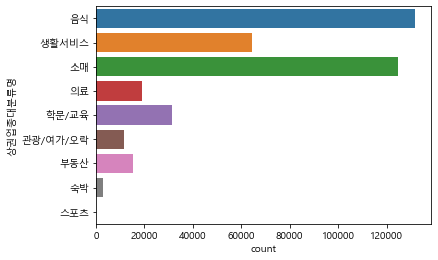

In [30]:
sns.countplot(data=df_seoul, y="상권업종대분류명")

In [18]:
df_food = df_seoul.loc[
    df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(131687, 39)

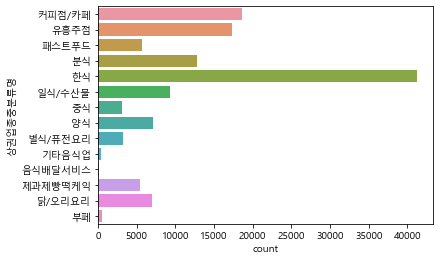

In [32]:
sns.countplot(data=df_food, y="상권업종중분류명")

## 퀴즈

#### '상권업종중분류명'이 '패스트푸드'인 데이타프레임 df_fast_food 을 정의하여라 
#### '상권업종중분류명'이 '패스트푸드'인 데이타프레임의 상호명은 모두 몇개인가?
#### '상권업종중분류명'이 '패스트푸드'인 데이타프레임에서 가장 많은 상호명은?
#### 서울에 있는 '피자'가 포함된 상호명 목록을 출력하여라
#### 서울 강남구에 있는 도미노피자의 지점명을 모두 출력하여라

In [19]:
df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.shape

(5683, 39)

In [34]:
df_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [20]:
df_fast_food['상호명'].value_counts()

배스킨라빈스31          131
피자스쿨              120
던킨도너츠             111
한솥도시락              90
롯데리아               87
한솥                 81
베스킨라빈스             72
이삭토스트              70
버거킹                66
피자마루               64
도미노피자              64
맥도날드               59
59피자               59
배스킨라빈스             58
피자헛                56
본도시락               46
미스터피자              44
파파존스피자             37
피자나라치킨공주           35
봉구스밥버거             33
써브웨이               31
피자알볼로              30
요거프레소              30
명랑핫도그              25
명랑시대쌀핫도그           24
맘스터치               24
서브웨이               20
크라제버거              20
임실치즈피자             20
석봉토스트              19
                 ... 
뽕뜨락피자&치킨            1
이삭토스트서울대입구역점        1
카니발피자고려대점           1
리얼시카고피자             1
둘레길도시락              1
배스킨라빈스남성역점          1
킴스앤커피,샌드            1
씨제이푸드빌푸드온에어         1
보트피자                1
더반                  1
이조도시락               1
153피자               1
롯데리아시흥중앙점           1
명랑시대쌀핫도그중랑구청점       1
배스킨라빈스31장승

In [21]:
df_fast_food['상호명'].value_counts()

배스킨라빈스31          131
피자스쿨              120
던킨도너츠             111
한솥도시락              90
롯데리아               87
한솥                 81
베스킨라빈스             72
이삭토스트              70
버거킹                66
피자마루               64
도미노피자              64
맥도날드               59
59피자               59
배스킨라빈스             58
피자헛                56
본도시락               46
미스터피자              44
파파존스피자             37
피자나라치킨공주           35
봉구스밥버거             33
써브웨이               31
피자알볼로              30
요거프레소              30
명랑핫도그              25
명랑시대쌀핫도그           24
맘스터치               24
서브웨이               20
크라제버거              20
임실치즈피자             20
석봉토스트              19
                 ... 
뽕뜨락피자&치킨            1
이삭토스트서울대입구역점        1
카니발피자고려대점           1
리얼시카고피자             1
둘레길도시락              1
배스킨라빈스남성역점          1
킴스앤커피,샌드            1
씨제이푸드빌푸드온에어         1
보트피자                1
더반                  1
이조도시락               1
153피자               1
롯데리아시흥중앙점           1
명랑시대쌀핫도그중랑구청점       1
배스킨라빈스31장승

In [23]:
df_seoul['상호명'][df_seoul['상호명'].str.contains('피자')].shape

(1857,)

In [74]:
df_seoul['상호명'][df_seoul['상호명'].str.contains('피자')].unique()

array(['피자마루', '솔로몬피자', '시장피자', '피자', '59피자', '도미노피자오금점', '피자스쿨', '피자에땅',
       '명품피자치킨', '피자헛', '도미노피자이문점', '피자클럽킴스', '피자스쿨장승배기', '도미노피자',
       '대장장이화덕피자', '피자글릭', '피자스쿨망우우림시장점', '카니발피자', '아이피자', '미스터피자신림녹두점',
       '빨간모자피자가좌점', '피자알볼로오류점', '미스터피자', '토니피자치킨족발', '빈스피자', '이태리피자',
       '빅마켓피자코트', '피자포유', '피자26', '디에이피자', '피자스쿨신월1호점', '피자굿망우우림점',
       '피자일마지오', '빨간고추피자', '피자알볼로옥수점', '코스트피자', '피자헛홍대본점', '밀라노피자',
       '모이또피자', '피자와김밥천국', '한국피자헛한티역', '제임스시카고피자', '영구스피자', '7번가피자',
       '한명숙피자펍', '피자샵', '빨간모자피자', '피자데이치킨데이', '조아피자', '왕서방피자', '피니치니피자',
       '수드피자', '우리집피자,돈치킨', '폴피자', '피자헤븐', '임실치즈피자', '피자스쿨본사', '피자세계',
       '피자나라치킨공주', '뽕뜨락피자', '명품임실치즈피자', '뽕뜨락피자점구로1점', '피자토비', '피자헛약수점',
       '리버티스피자', '명품임실피자', '피자스쿨송파1호점', '피자스쿨풍납점', '피자알볼로', '피자바람',
       '피자일일구', '나폴리피자치킨', '수피자', '준피자앤즉석떡볶이', '피자와치킨의러브레터', '피자몰',
       '조선피자', '피자애', '한스피자', '강정구의피자생각', '피자스쿨당산점', '계동피자',
       '이랜드크루즈피자몰노들', '논스톱피자치킨', '피자투어', '빨간모자피자명일점', '피자굼터',
       '강정구의피자생각광진점', '피자토랑', '피자헛중계

In [75]:
df_seoul[(df_seoul['시군구명']=='강남구') & (df_seoul['상호명'].str.contains('도미노피자'))]

상가업소번호       상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
15637   20561849     도미노피자   일원점         Q       음식       Q07    패스트푸드   
60151   20419152     도미노피자   역삼점         Q       음식       Q07    패스트푸드   
95331   20019922     도미노피자  압구정점         Q       음식       Q07    패스트푸드   
164850  20089674     도미노피자   삼성점         Q       음식       Q07    패스트푸드   
169394  25972841     도미노피자   개포점         Q       음식       Q07    패스트푸드   
298384  20027266     도미노피자   NaN         Q       음식       Q07    패스트푸드   
357569  20029019  도미노피자개포점   개포점         Q       음식       Q07    패스트푸드   
463327  12087838  도미노피자역삼점   역삼점         Q       음식       Q07    패스트푸드   

       상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호   건물명  \
15637     Q07A01     피자전문   I56192  ...  1168011400106870007002760   NaN   
60151     Q07A01     피자전문   I56192  ...  1168010100107210036023754  태현빌딩   
95331     Q07A01     피자전문   I56192  ...  1168010700106380002009656   NaN   
164850    Q07A01     피자전문   I56192  ...  1168010500100440018016108   NaN   
169394    Q07A04    패스트푸드   I56199  ...  1168011800109430000000288  뱅뱅빌딩   
298384    Q07A01     피자전문   I56192  ...  1168010100107790008024869   NaN   
357569    Q07A01     피자전문   I56192  ...  1168010300102280003020819  동진빌딩   
463327    Q07A01     피자전문   I56192  ...  1168010100107890000025387  동아빌딩   

                     도로명주소   구우편번호   신우편번호  동정보 층정보  호정보          경도  \
15637   서울특별시 강남구 일원로9길 18  135230  6343.0  NaN   1  NaN  127.083096   
60151    서울특별시 강남구 언주로 413  135080  6222.0  NaN   1  NaN  127.043581   
95331   서울특별시 강남구 압구정로 306  135896  6017.0  NaN   1  NaN  127.034736   
164850  서울특별시 강남구 봉은사로 451  135090  6097.0  NaN   1  NaN  127.048990   
169394  서울특별시 강남구 강남대로 292  135270  6258.0    1   4  NaN  127.032180   
298384   서울특별시 강남구 언주로 315  135080  6229.0  NaN   5  NaN  127.045508   
357569    서울특별시 강남구 논현로 58  135240  6312.0  NaN   1  NaN  127.047203   
463327   서울특별시 강남구 역삼로 146  135080  6249.0  NaN   1  NaN  127.035337   

               위도  
15637   37.489635  
60151   37.499828  
95331   37.528843  
164850  37.512036  
169394  37.489364  
298384  37.495915  
357569  37.475547  
463327  37.494508  

[8 rows x 39 columns]

In [76]:
df_seoul[(df_seoul['시군구명']=='강남구') & (df_seoul['상호명'].str.contains('도미노피자'))]['지점명']

15637      일원점
60151      역삼점
95331     압구정점
164850     삼성점
169394     개포점
298384     NaN
357569     개포점
463327     역삼점
Name: 지점명, dtype: object

In [84]:
df_seoul[(df_seoul['시군구명']=='강남구') & (df_seoul['상호명'].str.contains('도미노피자')) & (df_seoul['지점명'].isnull())]

상가업소번호    상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
298384  20027266  도미노피자  NaN         Q       음식       Q07    패스트푸드    Q07A01   

       상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
298384     피자전문   I56192  ...  1168010100107790008024869  NaN   

                    도로명주소   구우편번호   신우편번호  동정보 층정보  호정보          경도         위도  
298384  서울특별시 강남구 언주로 315  135080  6229.0  NaN   5  NaN  127.045508  37.495915  

[1 rows x 39 columns]

# 배스킨라빈스와 던킨도너츠 입지분석

In [24]:
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|베스킨|던킨')].copy()
df_31.shape

(651, 39)

In [26]:
df_31 = df_31[['상호명', '지점명', 
               '상권업종대분류명', '상권업종중분류명', 
               '지번주소', '도로명주소',  
               '위도', '경도', '시군구명', '행정동명']].copy()
df_31.shape

(651, 10)

In [41]:
df_31.head()

상호명     지점명 상권업종대분류명 상권업종중분류명                    지번주소  \
110          배스킨라빈스   관악구청점       음식    패스트푸드    서울특별시 관악구 봉천동 863-13   
1098          던킨도너츠   이대1호점       음식    패스트푸드    서울특별시 서대문구 대현동 33-13   
1838    던킨도너츠테크노마트점  테크노마트점       음식    패스트푸드     서울특별시 광진구 구의동 546-4   
2281     던킨도너츠창동하나로     NaN       음식    패스트푸드       서울특별시 도봉구 창동 1-10   
2338  던킨도너츠용산민자역사2호     NaN       음식    패스트푸드  서울특별시 용산구 한강로3가 40-999   

                     도로명주소         위도          경도  시군구명  행정동명  
110      서울특별시 관악구 관악로 161  37.479599  126.952166   관악구   청룡동  
1098   서울특별시 서대문구 이화여대길 56  37.559263  126.945369  서대문구   신촌동  
1838  서울특별시 광진구 광나루로56길 85  37.535713  127.095681   광진구  구의3동  
2281   서울특별시 도봉구 마들로11길 20  37.655101  127.050818   도봉구   창4동  
2338  서울특별시 용산구 한강대로21나길 7  37.527903  126.963223   용산구  한강로동

In [34]:
df_31['상호명'].value_counts()

배스킨라빈스31               102
던킨도너츠                   86
배스킨라빈스                  44
던킨도넛                     4
배스킨라빈스31화양삼거리점           1
배스킨라빈스31망우우림점            1
비알코리아던킨도너츠두산             1
배스킨라빈스31가락본동점            1
배스킨라빈스31굽은다리역점           1
던킨도너츠공항철도서울역사            1
던킨도너츠김포국제공항점             1
배스킨라빈스31영등포구청점           1
배스킨라빈스31천호로데오점           1
배스킨라빈스용산후암               1
던킨도너츠오목교점                1
배스킨라빈스31숙명여대점            1
배스킨라빈스공릉점                1
배스킨라빈스31보라매공원점           1
배스킨라빈스31홍은동점             1
던킨도너츠석촌역점                1
배스킨라빈스31강서구청점            1
배스킨라빈스31개봉푸르지오점          1
배스킨라빈스31한양대점             1
배스킨라빈스서울베이비키즈페어임시부스      1
던킨도너츠김포공항국내선             1
배스킨라빈스성동금호점              1
던킨도너츠시청역                 1
배스킨라빈스31문정역점             1
던킨도너츠구로태평양물산점            1
배스킨라빈스31신정점              1
                      ... 
던킨도너츠아이비케이               1
배스킨라빈스31성수이마트점           1
배스킨라빈스31안암점              1
성북역맞이방던킨도너츠              1
던킨도너츠보라매타운점              1
배스킨라빈스31면목역점             1
배

In [31]:
# 브랜드명이라는 컬럼을 새로 만들어줍니다.
df_31['브랜드명'] = ''

In [32]:
df_31[['상호명', '브랜드명']].head()

상호명 브랜드명
110        배스킨라빈스     
1098        던킨도너츠     
1838  던킨도너츠테크노마트점     
2145       베스킨라빈스     
2281   던킨도너츠창동하나로

In [33]:
df_31.loc[df_31['상호명'].str.contains('배스킨|베스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [34]:
df_31[['상호명', '브랜드명']].head()

상호명    브랜드명
110        배스킨라빈스  배스킨라빈스
1098        던킨도너츠   던킨도너츠
1838  던킨도너츠테크노마트점   던킨도너츠
2145       베스킨라빈스  배스킨라빈스
2281   던킨도너츠창동하나로   던킨도너츠

In [35]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    462
던킨도너츠     189
Name: 브랜드명, dtype: int64

In [36]:
df_31_ratio = df_31_group_count[0]/
                 df_31_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 
      배스킨라빈스의 매장이 {0:.2f}배가량 많습
      니다.'.format(df_31_ratio))

제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 2.44배가량 많습니다.


In [50]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 110 to 558398
Data columns (total 11 columns):
상호명         532 non-null object
지점명         442 non-null object
상권업종대분류명    532 non-null object
상권업종중분류명    532 non-null object
지번주소        532 non-null object
도로명주소       532 non-null object
위도          532 non-null float64
경도          532 non-null float64
시군구명        532 non-null object
행정동명        532 non-null object
브랜드명        532 non-null object
dtypes: float64(2), object(9)
memory usage: 49.9+ KB


In [37]:
df_31['위도'] = df_31['위도'].astype(float)
df_31['경도'] = df_31['경도'].astype(float)

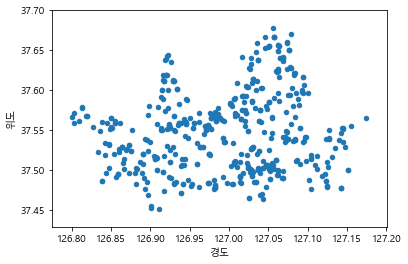

In [51]:
# Pandas 로 scatter plot 그리기
df_31.plot.scatter(x='경도', y='위도')

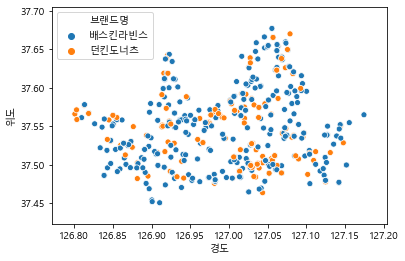

In [52]:
# seaborn 으로 scatter plot 그리기
sns.scatterplot(data=df_31, x='경도', y='위도'
                , hue="브랜드명")

## Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [46]:
# folium.Map?

In [38]:
geo_df = df_31.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), 
                           geo_df['경도'].mean()], 
                           zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' 
                  + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'pink'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df.loc[n, '위도'], 
                   geo_df.loc[n, '경도']], 
                   popup=popup_name, 
    icon=folium.Icon(color=icon_color)).add_to(map)

map

In [41]:
map = folium.Map(location=[geo_df['위도'].mean(), 
                           geo_df['경도'].mean()], 
                 zoom_start=12, 
                 tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n,'도로명주소']    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n,'브랜드명'] == '던킨도너츠' :
        icon_color = 'red'
    else:
        icon_color = 'blue'    
    
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], 
                  geo_df.loc[n,'경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

# 뚜레쥬르, 파리바게뜨 매장 위치 분석

In [42]:
df_bread = df_seoul.loc[
    df_seoul['상호명'].str.contains(
        '뚜레쥬르|파리(바게|크라상)') 
       &
       (~df_seoul['상호명'].str.contains(
        '파스쿠찌|잠바주스')
   )
].copy()
# 파스쿠찌 상호명에 파리크라상이 들어가기 때문에 파스쿠찌는 제외합니다.
df_bread.shape

(811, 39)

In [57]:
df_bread['상호명'].value_counts()

파리바게뜨               283
뚜레쥬르                177
파리크라상                23
파리바게뜨카페대학로점           2
회기역파리바게뜨              2
씨제이뚜레쥬르               2
파리바게뜨까페               2
파리바게뜨월계미성             2
파리바게뜨성북점              2
파리바게뜨연신내              1
뚜레쥬르공덕역점              1
뚜레쥬르화곡역점              1
뚜레쥬르신풍역               1
씨제이푸드빌뚜레쥬르배명사거리       1
파리바게뜨신길돈보스코점          1
파리바게뜨카페               1
파리바게뜨잠실5단지            1
파리바게뜨역삼초교             1
파리바게뜨연희대우점            1
파리바게뜨묵동삼거리점           1
파리바게뜨청담사거리점           1
파리바게뜨상계보람점            1
파리바게뜨길동사거리점           1
뚜레쥬르둔촌대우              1
파리바게뜨중계두타빌            1
파리바게뜨사가정              1
파리바게뜨송파레미안점           1
파리바게뜨종로구청             1
뚜레쥬르레이크펠리스점           1
파리바게뜨하계벽산점            1
                   ... 
여의도2호파리크라상            1
파리바게뜨구로제일점            1
뚜레쥬르대림3동점             1
파리크라상강남점              1
파리바게트17789위례아이파크      1
뚜레쥬르송천센트레빌점           1
카페약수파리바게트             1
파리바게트은평뉴타운            1
파리바게뜨육사화랑회관점          1
파리바게뜨방이점              1
파리바게뜨수서동성당점     

In [58]:
df_bread.loc[df_bread['상호명'].str.contains('파리(바게|크라상)'), '브랜드명'] = '파리바게뜨'
df_bread.loc[df_bread['상호명'].str.contains('뚜레(쥬|주)르'), '브랜드명'] = '뚜레쥬르'

In [59]:
df_bread_group_count = df_bread['브랜드명'].value_counts()
df_bread_group_count

파리바게뜨    554
뚜레쥬르     257
Name: 브랜드명, dtype: int64

In [63]:
df_bread.shape

(811, 40)

In [62]:
554 + 257

811

In [67]:
df_bread_ratio = df_bread_group_count[0]/df_bread_group_count[1]
print(f'제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 {df_31_ratio:.2f}배가량 많습니다.')

제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 1.81배가량 많습니다.


In [66]:
734/240

3.058333333333333

#### 하지만, 파리바게뜨 홈페이지에서 서울시특별시의 매장정보를 보면 734개의 매장이 있습니다. 뚜레쥬르는 240개의 매장이 있습니다.
* 파리바게뜨 : https://www.paris.co.kr/store/store_list.jsp?sido=&gugun=&s_sido=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&s_gugun=&s_name=&page=98
* 뚜레쥬르 : https://www.tlj.co.kr:7008/store/search.asp?store_type=&sido=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&gugun=&keyword=

In [68]:
df_tou = df_bread[df_bread["브랜드명"] == "뚜레쥬르"]
df_paris = df_bread[df_bread["브랜드명"] == "파리바게뜨"]

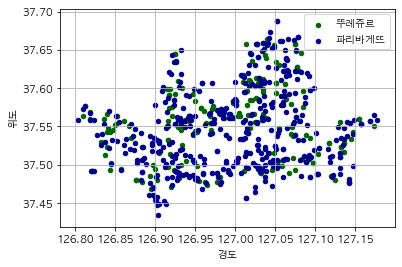

In [59]:
# pandas로 그리기
ax = df_tou[["경도", "위도", "브랜드명"]].plot.
      scatter(x='경도', y='위도', 
              color='DarkGreen', label='뚜레쥬르')
df_paris[["경도", "위도", "브랜드명"]].plot.
      scatter(x='경도', y='위도', 
              color='DarkBlue', label='파리바게뜨', 
              ax=ax, grid=True)

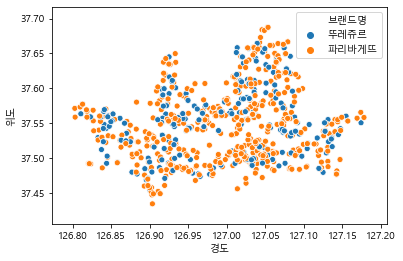

In [69]:
# seaborn 으로 그리기
sns.scatterplot(data=df_bread, x='경도', y='위도', 
                hue='브랜드명')

In [70]:
geo_df = df_bread.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '뚜레쥬르' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df['위도'][n], 
                   geo_df['경도'][n]], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [71]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '뚜레쥬르' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
      
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], 
                  geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## 스타벅스, 이디야 위치 분석
* [[비즈&빅데이터]스타벅스 '쏠림' vs 이디야 '분산'](http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015)

In [63]:
df_seoul.loc[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '상호명'].shape

(438,)

In [64]:
df_seoul.loc[df_seoul['상호명'].str.contains('이디야|ediya|EDIYA'), '상호명'].shape

(452,)

In [65]:
df_cafe = df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')]
df_cafe.shape

(890, 39)

In [66]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '스타벅스'

In [67]:
# df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '이디야'

In [68]:
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [69]:
df_cafe.loc[df_cafe['브랜드명'].isnull(), '상호명'].head()

Series([], Name: 상호명, dtype: object)

In [70]:
df_cafe[['상호명','브랜드명']].head()

상호명  브랜드명
1492                 이디야커피   이디야
1682             스타벅스종로3가점  스타벅스
2419                 이디야커피   이디야
7271   이디야커피중계롯데우성점중계롯데우성점   이디야
12008                이디야커피   이디야

In [71]:
df_cafe['브랜드명'].value_counts()

이디야     452
스타벅스    438
Name: 브랜드명, dtype: int64

In [72]:
geo_df = df_cafe

In [73]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## 구별 브랜드별 점포수

In [74]:
df_cafe_brand = pd.DataFrame(
    df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()
df_cafe_brand.columns = ['구', '브랜드명', '매장수']
df_cafe_brand

구  브랜드명  매장수
0    강남구  스타벅스   69
1    강남구   이디야   32
2    강동구  스타벅스   10
3    강동구   이디야   12
4    강북구  스타벅스    5
5    강북구   이디야   12
6    강서구  스타벅스   14
7    강서구   이디야   34
8    관악구  스타벅스    9
9    관악구   이디야   23
10   광진구  스타벅스   14
11   광진구   이디야   13
12   구로구  스타벅스   11
13   구로구   이디야   21
14   금천구  스타벅스    9
15   금천구   이디야   10
16   노원구  스타벅스    9
17   노원구   이디야   30
18   도봉구  스타벅스    1
19   도봉구   이디야    9
20  동대문구  스타벅스    8
21  동대문구   이디야   18
22   동작구  스타벅스    7
23   동작구   이디야   10
24   마포구  스타벅스   29
25   마포구   이디야   20
26  서대문구  스타벅스   17
27  서대문구   이디야   11
28   서초구  스타벅스   43
29   서초구   이디야   19
30   성동구  스타벅스    6
31   성동구   이디야   17
32   성북구  스타벅스   13
33   성북구   이디야   21
34   송파구  스타벅스   26
35   송파구   이디야   28
36   양천구  스타벅스    9
37   양천구   이디야   16
38  영등포구  스타벅스   26
39  영등포구   이디야   25
40   용산구  스타벅스   17
41   용산구   이디야   10
42   은평구  스타벅스    9
43   은평구   이디야   19
44   종로구  스타벅스   28
45   종로구   이디야   14
46    중구  스타벅스   43
47    중구   이디야   20
48   중랑구  스타벅스    6
49   중랑구   이디야    8

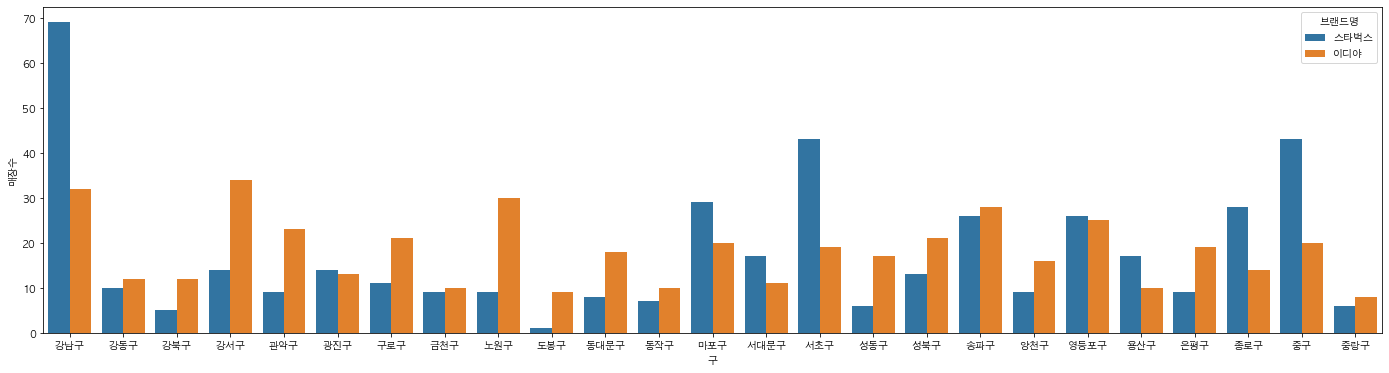

In [75]:
plt.figure(figsize=(24, 6))
sns.barplot(data=df_cafe_brand, x='구', y='매장수', hue='브랜드명')

In [76]:
df_cafe.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     101
강동구      22
강북구      17
강서구      48
관악구      32
광진구      27
구로구      32
금천구      19
노원구      39
도봉구      10
동대문구     26
동작구      17
마포구      49
서대문구     28
서초구      62
성동구      23
성북구      34
송파구      54
양천구      25
영등포구     51
용산구      27
은평구      28
종로구      42
중구       63
중랑구      14
Name: 상호명, dtype: int64

In [77]:
df_cafe_gu = pd.DataFrame(df_cafe.groupby(['시군구명'])['상호명'].count())
df_cafe_gu.head()

상호명
시군구명     
강남구   101
강동구    22
강북구    17
강서구    48
관악구    32

## choropleth 그리기

* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)

In [78]:
import json

geo_path = '../data/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

### 스타벅스 이디야 카페 매장 합계 분포

In [79]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = geo_json,
               data = df_cafe_gu['상호명'],
               columns = [df_cafe_brand.index, df_cafe_gu['상호명']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다. 
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

### 스타벅스 매장 분포

In [80]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '스타벅스']
df_cafe_starbucks = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_starbucks.columns = ['매장수']
df_cafe_starbucks.head()

매장수
시군구명     
강남구    69
강동구    10
강북구     5
강서구    14
관악구     9

In [81]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_starbucks['매장수'],
               columns = [df_cafe_starbucks.index, df_cafe_starbucks['매장수']],
               fill_color = 'YlGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'    

            
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

### 이디야 매장 분포

In [82]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '이디야']
df_cafe_ediya = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_ediya.columns = ['매장수']
df_cafe_ediya.head()

매장수
시군구명     
강남구    32
강동구    12
강북구    12
강서구    34
관악구    23

In [83]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_ediya['매장수'],
               columns = [df_cafe_ediya.index, df_cafe_ediya['매장수']],
               fill_color = 'PuBu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '이디야' :
        icon_color = 'blue'    

            
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

## 매장수 크기를 반영해 CircleMaker 그리기
### Pandas 의 reshaping data 활용하기

<img src="https://i.imgur.com/IIhU0nF.png">

* 출처 : https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* reshaping 관련 문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [84]:
df_cafe_brand.head()

구  브랜드명  매장수
0  강남구  스타벅스   69
1  강남구   이디야   32
2  강동구  스타벅스   10
3  강동구   이디야   12
4  강북구  스타벅스    5

In [85]:
df_cafe_brand_vs = df_cafe_brand.pivot_table(index='구',
                                             columns='브랜드명',
                                             values='매장수')
df_cafe_brand_vs.columns = ['스타벅스', '이디야']
df_cafe_brand_vs.head()

스타벅스  이디야
구             
강남구    69   32
강동구    10   12
강북구     5   12
강서구    14   34
관악구     9   23

In [86]:
df_cafe_brand_vs['매장수비교'] = df_cafe_brand_vs.apply( \
    lambda x : 1 if x['스타벅스'] > x['이디야'] else 0, axis=1)
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교
구                    
강남구    69   32      1
강동구    10   12      0
강북구     5   12      0
강서구    14   34      0
관악구     9   23      0

In [87]:
lng_list = []
lat_list = []
for gu in df_cafe_brand_vs.index:
    lat = df_cafe.loc[df_cafe['시군구명'] == gu, '위도'].mean()
    lng = df_cafe.loc[df_cafe['시군구명'] == gu, '경도'].mean()
    lat_list.append(lat)
    lng_list.append(lng)
    
df_cafe_brand_vs['위도'] = lat_list
df_cafe_brand_vs['경도'] = lng_list
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교         위도          경도
구                                           
강남구    69   32      1  37.506968  127.044551
강동구    10   12      0  37.540750  127.137271
강북구     5   12      0  37.632347  127.022071
강서구    14   34      0  37.554969  126.839652
관악구     9   23      0  37.481530  126.934320

In [88]:
# CircleMarker의 radius 지정시 다음과 같은 타입오류가 나서 float type 으로 변경
# TypeError: Object of type 'int64' is not JSON serializable

df_cafe_brand_vs['스타벅스'] = df_cafe_brand_vs['스타벅스'].astype(float)
df_cafe_brand_vs['이디야'] = df_cafe_brand_vs['이디야'].astype(float)
df_cafe_brand_vs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 5 columns):
스타벅스     25 non-null float64
이디야      25 non-null float64
매장수비교    25 non-null int64
위도       25 non-null float64
경도       25 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.2+ KB


In [89]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_brand_vs['매장수비교'],
               columns = [df_cafe_brand_vs.index, 
                          df_cafe_brand_vs['매장수비교']],
               fill_color = 'BuGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for gu in df_cafe_brand_vs.index:
        
    for cafe in ['스타벅스', '이디야']:
        
        cafe_count = df_cafe_brand_vs.loc[gu, cafe]
        msg = f'{gu} {cafe} 매장수 : {cafe_count:.0f}'
        
        icon_color = 'blue'
        if cafe == '스타벅스': 
            icon_color = 'green'
        
        
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location = [df_cafe_brand_vs.loc[gu,'위도'], 
                      df_cafe_brand_vs.loc[gu, '경도']],
            radius = cafe_count,
            color = icon_color,
            popup = msg,
            fill = True,
            fill_color = icon_color
        ).add_to(map)

map

#### 지도 출력 시 색상 참고
* http://colorbrewer2.org/

## folium 공부를 위해 더 읽어보면 좋을 것 
* https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
* https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps
* [PinkWink의 데이터 사이언스 관련 책 - 파이썬으로 데이터 주무르기](https://pinkwink.kr/1070)

## 카토그램 
* [총선⑫ 인구 비례로 본 당선 지도…‘카토그램’으로 살펴본 당선 현황 > 데이터룸 > 정치 > 뉴스 | KBSNEWS](http://news.kbs.co.kr/news/view.do?ncd=3264019)
* [The Housing Value of Every County in the U.S. - Metrocosm](http://metrocosm.com/the-housing-value-of-every-county-in-the-u-s/)